In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("C:/Users/Cold min/OneDrive/바탕 화면/DryBeanDataset/Dry_Bean_Dataset.csv")

In [3]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [5]:
data.isnull().sum()# 결측치 제거

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [8]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,788,541,114,3086,580,580,787,788,7199,7839,12790,12966,10359,13430,12966,12252,5
1,848,1108,41,4592,33,33,874,848,9738,2912,7084,13508,8824,13503,13508,11542,5
2,982,788,181,3397,697,697,986,982,8934,9262,12301,12857,10030,13364,12857,12988,5
3,1129,1314,140,4545,212,212,1242,1129,9566,464,8786,13291,9020,13457,13291,3831,5
4,1169,722,50,6235,7,7,1163,1169,8287,11578,13530,13536,7139,13505,13536,13157,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,4994,5497,6279,5257,6844,6844,5008,4994,3058,10686,10103,6809,8143,7109,6809,11418,3
13607,4995,5419,5810,6328,4516,4516,5000,4995,11801,11383,10631,9116,7074,8119,9116,11006,3
13608,5004,5481,5806,6458,4381,4381,5035,5004,4211,9917,10299,9165,7028,8138,9165,7524,3
13609,5010,5649,5928,6233,4928,4928,5060,5010,2372,5950,9190,8563,7285,7880,8563,4947,3


In [15]:
# 데이터 분할
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
encoder =  LabelEncoder()

X = data.drop('Class', axis=1)
y = data['Class']


from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
X_train.shape

(10888, 16)

In [17]:
y_train.shape

(10888, 7)

In [20]:
#Defining the model 

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam
 

def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(44, activation='relu', input_shape=(16,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(7, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 44)                748       
                                                                 
 dense_9 (Dense)             (None, 20)                900       
                                                                 
 dense_10 (Dense)            (None, 16)                336       
                                                                 
 dense_11 (Dense)            (None, 7)                 119       
                                                                 
Total params: 2,103
Trainable params: 2,103
Non-trainable params: 0
_________________________________________________________________


In [21]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
341/341 [==============================] - 1s 1ms/step - loss: 66.1675 - accuracy: 0.2463 - val_loss: 1.8445 - val_accuracy: 0.2736
Epoch 2/100
341/341 [==============================] - 0s 1ms/step - loss: 1.7949 - accuracy: 0.3025 - val_loss: 1.8042 - val_accuracy: 0.2754
Epoch 3/100
341/341 [==============================] - 0s 995us/step - loss: 1.7266 - accuracy: 0.3209 - val_loss: 1.6987 - val_accuracy: 0.3202
Epoch 4/100
341/341 [==============================] - 0s 1ms/step - loss: 1.6752 - accuracy: 0.3440 - val_loss: 1.8255 - val_accuracy: 0.2732
Epoch 5/100
341/341 [==============================] - 0s 948us/step - loss: 1.6822 - accuracy: 0.3441 - val_loss: 1.6084 - val_accuracy: 0.3489
Epoch 6/100
341/341 [==============================] - 0s 1ms/step - loss: 1.6339 - accuracy: 0.3707 - val_loss: 1.6641 - val_accuracy: 0.3478
Epoch 7/100
341/341 [==============================] - 0s 1ms/step - loss: 1.5573 - accuracy: 0.4246 - val_loss: 1.5111 - val_accuracy: 0

341/341 [==============================] - 0s 972us/step - loss: 0.8682 - accuracy: 0.6612 - val_loss: 0.8924 - val_accuracy: 0.6184
Epoch 58/100
341/341 [==============================] - 0s 988us/step - loss: 0.8561 - accuracy: 0.6704 - val_loss: 0.8997 - val_accuracy: 0.6001
Epoch 59/100
341/341 [==============================] - 0s 990us/step - loss: 0.8543 - accuracy: 0.6643 - val_loss: 0.8935 - val_accuracy: 0.6687
Epoch 60/100
341/341 [==============================] - 0s 986us/step - loss: 0.8372 - accuracy: 0.6749 - val_loss: 1.0368 - val_accuracy: 0.6243
Epoch 61/100
341/341 [==============================] - 0s 943us/step - loss: 0.8582 - accuracy: 0.6661 - val_loss: 0.8989 - val_accuracy: 0.6357
Epoch 62/100
341/341 [==============================] - 0s 1ms/step - loss: 0.8498 - accuracy: 0.6756 - val_loss: 0.8659 - val_accuracy: 0.6607
Epoch 63/100
341/341 [==============================] - 0s 926us/step - loss: 0.8517 - accuracy: 0.6661 - val_loss: 0.8590 - val_accuracy: 

In [22]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.60      0.88      0.71       264
           1       0.00      0.00      0.00       123
           2       0.86      0.88      0.87       330
           3       0.87      0.92      0.89       692
           4       0.96      0.89      0.92       351
           5       0.96      0.94      0.95       446
           6       0.84      0.82      0.83       517

    accuracy                           0.85      2723
   macro avg       0.73      0.76      0.74      2723
weighted avg       0.82      0.85      0.83      2723

[[231   0  12   3   0   2  16]
 [110   0  10   0   0   0   3]
 [ 27   0 290   1  11   0   1]
 [  1   0   0 634   0  12  45]
 [  4   0  23   4 311   0   9]
 [  0   0   0  16   0 421   9]
 [ 12   0   3  73   2   3 424]]


C:\Users\Cold min\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cold min\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cold min\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


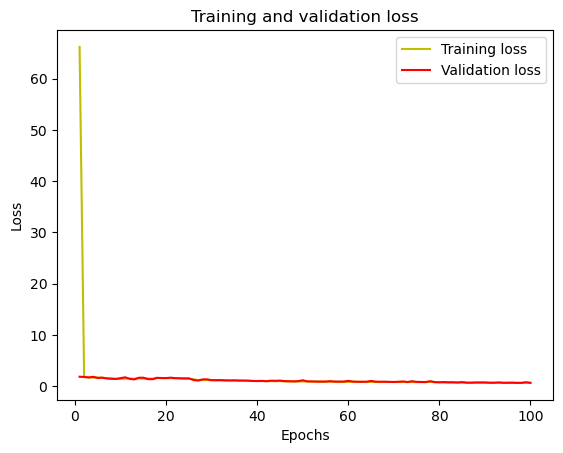

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

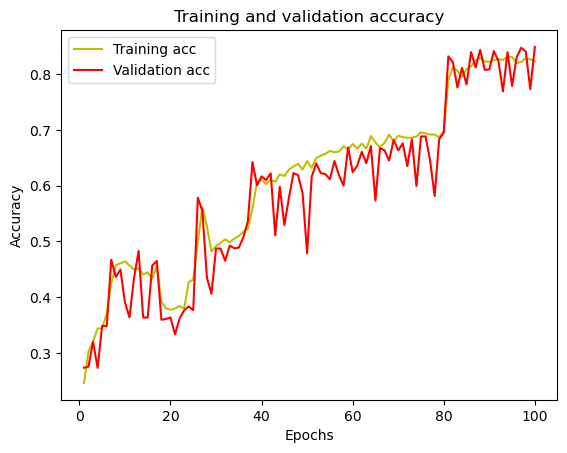

In [25]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()